In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [4]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


## Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?
Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [14]:
frequency_table = df['category'].value_counts(normalize=True)
frequency_table

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
                                            ...   
Motorbike Chassis                         0.000044
Alexa Built-In Devices                    0.000044
Plugs                                     0.000044
Smart Home Security & Lighting            0.000043
Smart Speakers                            0.000022
Name: proportion, Length: 296, dtype: float64

In [15]:
frequency_table.head(5)

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
Name: proportion, dtype: float64

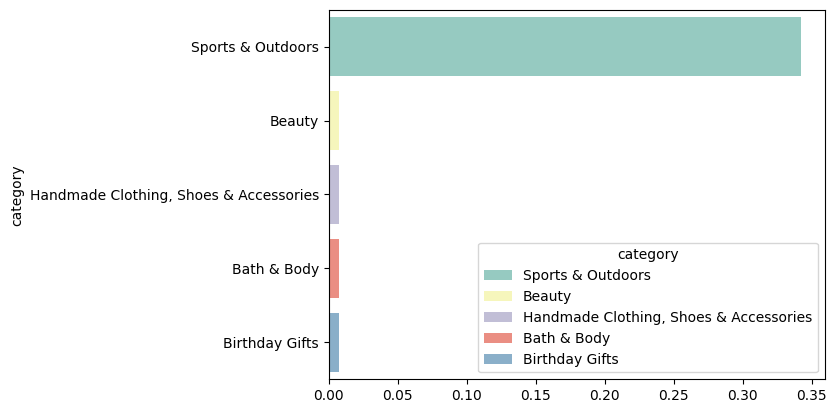

In [19]:
ax=sns.barplot(y=frequency_table.index[:5], x=frequency_table.values[:5], palette="Set3", hue=frequency_table.index[:5], legend=True )
sns.move_legend(ax, "lower right")

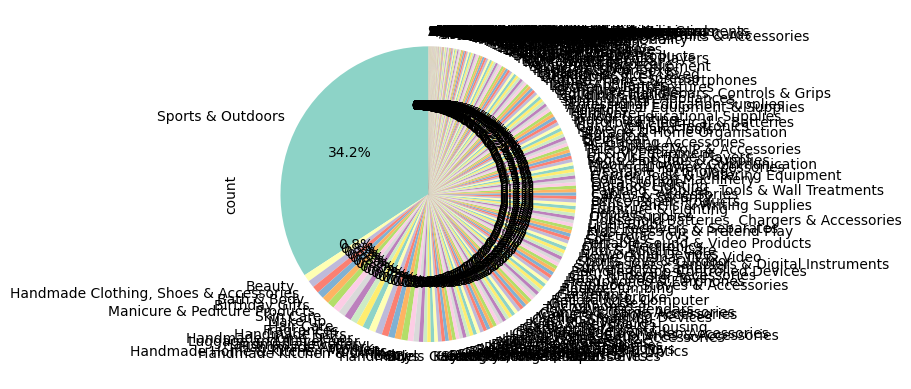

In [24]:
df['category'].value_counts().plot.pie(autopct='%.1f%%', startangle=90, colors=sns.color_palette("Set3"));
plt.show()

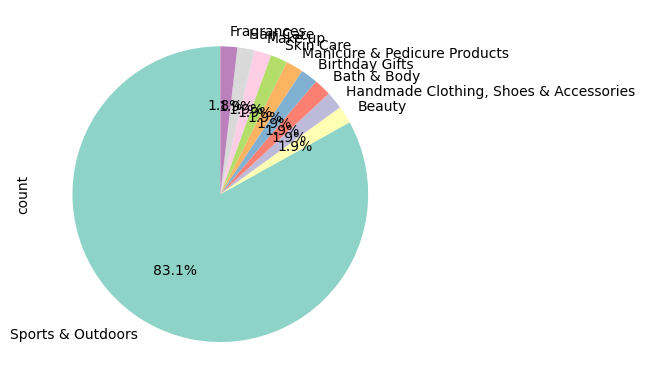

In [25]:
df['category'].value_counts().head(10).plot.pie(autopct='%.1f%%', startangle=90, colors=sns.color_palette("Set3"));
plt.show()

## Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?
Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?
Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.


In [30]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]
var_price = df['price'].var()
std_price = df['price'].std()
mean_price, median_price, mode_price, var_price,std_price

(np.float64(89.24380943923661), np.float64(19.09), np.float64(9.99))

In [31]:
price_range = df['price'].max() - df['price'].min()
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

price_range, iqr_price


(np.float64(100000.0), np.float64(36.0))

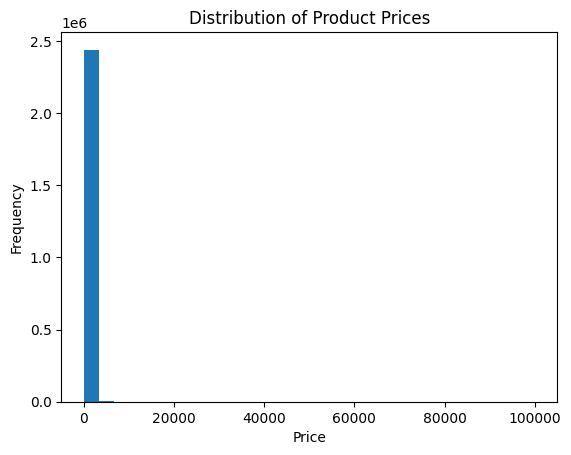

In [32]:
plt.hist(df['price'], bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')
plt.show()


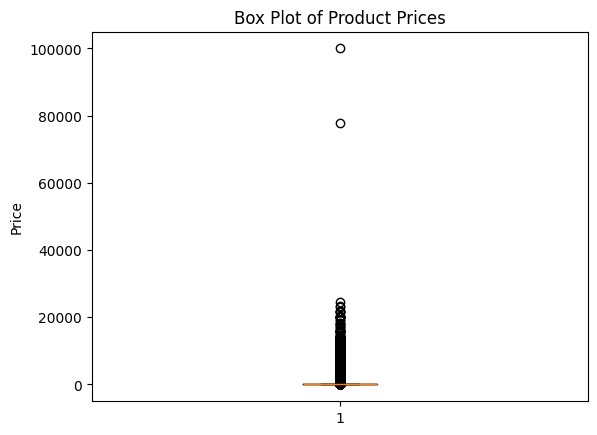

In [33]:
plt.boxplot(df['price'])
plt.ylabel('Price')
plt.title('Box Plot of Product Prices')
plt.show()


The histogram of product prices is difficult to interpret because the distribution is highly right-skewed. A small number of products with extremely high prices extend the range of the x-axis, which compresses the bars corresponding to the lower price range where most products are actually concentrated. As a result, differences within the most common price ranges become hard to distinguish.

One effective way to improve readability is to filter out extreme outliers. For example, restricting the analysis to products priced below a high percentile (such as the 95th percentile) allows us to focus on the price range where the majority of products fall, without significantly distorting the overall distribution.

This approach does not ignore the existence of expensive products; instead, it enables a clearer visualization of typical pricing behavior while treating extreme values separately.

## Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [35]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

mean_rating, median_rating, mode_rating


(np.float64(2.152836472966066), np.float64(0.0), np.float64(0.0))

In [36]:
df['stars'].dtype


dtype('float64')

In [37]:
(df['stars'] == 0).sum()


np.int64(1225641)

In [38]:
df['stars'].shape[0]


2443651

In [39]:
df.loc[df['stars'] == 0, 'stars'] = np.nan


In [40]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

mean_rating, median_rating, mode_rating


(np.float64(4.319160762226911), np.float64(4.4), np.float64(4.5))

Customers generally rate products very positively on Amazon UK.
The mean and median ratings are both high, indicating that most products receive good reviews.
The mode shows the most common rating value, typically around 4–5 stars, which suggests a clear tendency toward high ratings rather than neutral or negative ones.

Overall, there is a strong positive trend in customer feedback.

In [43]:
var_rating = df['stars'].var()
std_rating = df['stars'].std()
iqr_rating = (df['stars'].quantile(0.75) - df['stars'].quantile(0.25))

var_rating, std_rating, iqr_rating


(np.float64(0.3083433752387284),
 np.float64(0.5552867504620729),
 np.float64(0.5))

The variance and standard deviation of product ratings are relatively low, indicating that ratings are quite consistent across products.
The interquartile range shows that the middle 50% of ratings are concentrated within a narrow interval, reinforcing the idea that most customers provide similar (and generally high) ratings.

This suggests limited variation in customer opinions.

In [45]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating


(np.float64(-2.379568112212799), np.float64(9.78193769066435))

The skewness value is negative, indicating a left-skewed distribution. This means that ratings are concentrated towards the higher end of the scale, with fewer low ratings.

The kurtosis value shows that the distribution is not perfectly normal, as ratings are strongly clustered around high values rather than evenly spread.

Overall, product ratings lean toward higher values, reflecting generally positive customer sentiment.

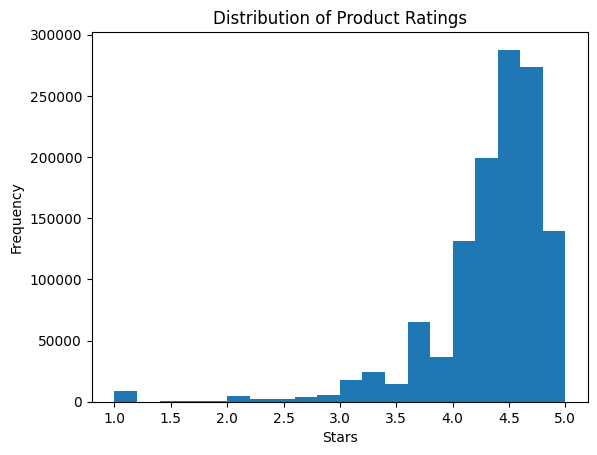

In [47]:
plt.hist(df['stars'].dropna(), bins=20)
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings')
plt.show()


The histogram shows a clear peak at high star values, especially between 4 and 5 stars, indicating that these ratings are the most common.
Lower ratings appear much less frequently, confirming the strong positive bias observed in the numerical measures.